In [1]:
import nsfg
import thinkstats2
import thinkplot
import numpy as np
resp = nsfg.ReadFemResp() 

In [2]:
timesmar=resp['timesmar']
timesmar=timesmar.dropna()

In [3]:
jintendn=resp['jintendn']
jintendn=jintendn.dropna() 

In [4]:
mtimesmar, stimesmar = timesmar.mean(), timesmar.std()
mtimesmar, stimesmar 

(1.3870576829859429, 4.2971130232530834)

In [5]:
mjintendn, sjintendn= jintendn.mean(), jintendn.std()
mjintendn, sjintendn 

(2.7052556818181817, 9.710108051456988)

In [6]:
pdf = thinkstats2.NormalPdf(mtimesmar, stimesmar)
pdf.Density(mtimesmar+stimesmar )

0.056310067529003929

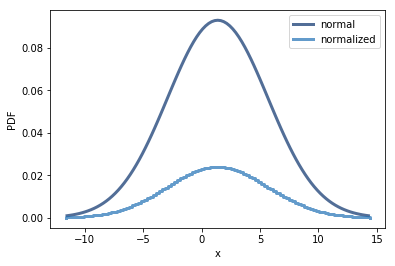

In [7]:
thinkplot.Pdf(pdf, label='normal')
thinkplot.Config(xlabel='x', ylabel='PDF')
pmf = pdf.MakePmf()
thinkplot.Pmf(pmf, label='normalized')
thinkplot.Config(xlabel='x', ylabel='PDF')

In [9]:
pdfofjintendn = thinkstats2.NormalPdf(mjintendn, sjintendn)
pdfofjintendn.Density(mjintendn+sjintendn )


0.024919467758428907

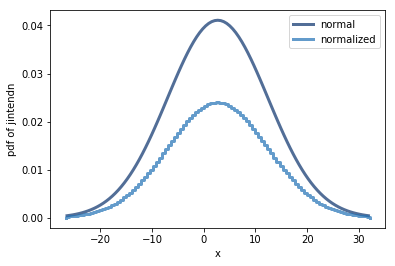

In [11]:
thinkplot.Pdf(pdfofjintendn, label='normal') 
thinkplot.Config(xlabel='x', ylabel='pdf of jintendn')
pmfofjintendn = pdfofjintendn.MakePmf()
thinkplot.Pmf(pmfofjintendn, label='normalized')
thinkplot.Config(xlabel='x', ylabel='pdf of jintendn')

we can see the difference between Normal Probability Density Functions, and Normalized Probability Density Functions

In [12]:
timesmar1=resp['timesmar']
mtimesmar1, stimesmar1 = timesmar1.mean(), timesmar1.std()

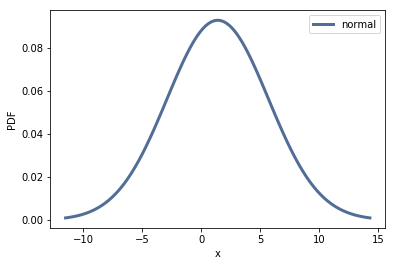

In [13]:
pdf1 = thinkstats2.NormalPdf(mtimesmar1, stimesmar1)
pdf1.Density(mtimesmar1+stimesmar1 )
thinkplot.Pdf(pdf1, label='normal')
thinkplot.Config(xlabel='x', ylabel='PDF')

In [14]:
jintendn1=resp['jintendn']
mjintendn1, sjintendn1= jintendn1.mean(), jintendn1.std()

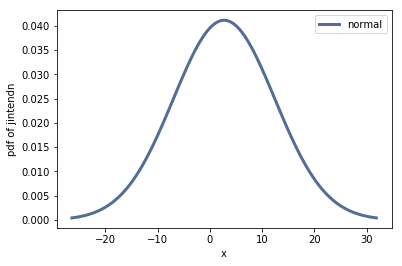

In [15]:
pdfofjintendn1 = thinkstats2.NormalPdf(mjintendn1, sjintendn1)
pdfofjintendn1.Density(mjintendn1+sjintendn1)
thinkplot.Pdf(pdfofjintendn1, label='normal')
thinkplot.Config(xlabel='x', ylabel='pdf of jintendn')

In [16]:
def RawMoment(xs, k):
    return sum(x**k for x in xs) / len(xs)

In [17]:
RawMoment(timesmar, 1), RawMoment(timesmar, 2), RawMoment(timesmar, 3)

(1.387057682985943, 20.384634028114398, 1841.8805138148327)

In [18]:
RawMoment(jintendn, 1), RawMoment(jintendn, 2), RawMoment(jintendn, 3)

(2.7052556818181817, 101.53764204545455, 9643.665482954546)

In [19]:
def Mean(xs):
    return RawMoment(xs, 1)

Mean(jintendn) 

2.7052556818181817

In [20]:
def Mean(xs):
    return RawMoment(xs, 1)

Mean(timesmar) 

1.387057682985943

In [21]:
def CentralMoment(xs, k):
    mean = RawMoment(xs, 1)
    sumlist = [(x - mean)**k for x in xs]
    return sum(sumlist) / len(sumlist)

In [22]:
CentralMoment(jintendn, 1), CentralMoment(jintendn, 2), CentralMoment(jintendn, 3)

(-2.6620120249535003e-15, 94.21923374144507, 8859.205965061536)

In [23]:
CentralMoment(timesmar, 1), CentralMoment(timesmar, 2), CentralMoment(timesmar, 3)

(-1.2793127358889589e-15, 18.460705012183197, 1762.3937251304174)

In [24]:
def Var(xs):
    return CentralMoment(xs, 2)

Var(timesmar)

18.460705012183197

In [25]:
def Var(xs):
    return CentralMoment(xs, 2)

Var(jintendn)

94.21923374144507

In [26]:
def StandardizedMoment(xs, k):
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    return CentralMoment(xs, k) / std**k

In [27]:
StandardizedMoment(timesmar, 1), StandardizedMoment(timesmar, 2), StandardizedMoment(timesmar, 3)

(-2.9775055665951693e-16, 1.0000000000000002, 22.219307220678285)

In [28]:
StandardizedMoment(jintendn, 1), StandardizedMoment(jintendn, 2), StandardizedMoment(jintendn, 3)

(-2.7424595395358908e-16, 1.0, 9.6869140579335831)

In [29]:
def Skewness(xs):
    return StandardizedMoment(xs, 3)

Skewness(timesmar ) 

22.219307220678285

as we expected, the mean is more than the median

In [30]:
def Skewness(xs):
    return StandardizedMoment(xs, 3)

Skewness(jintendn ) 

9.6869140579335831

In [31]:
def Median(xs):
    cdf = thinkstats2.Cdf(xs)
    return cdf.Value(0.5)

In [32]:
Mean(timesmar), Median(timesmar)

(1.387057682985943, 1.0)

In [33]:
Mean(jintendn), Median(jintendn)

(2.7052556818181817, 1.0)

In [35]:
def PearsonMedianSkewness(xs):
    median = Median(xs)
    mean = RawMoment(xs, 1)
    var = CentralMoment(xs, 2)
    sd = np.sqrt(var)
    gp = 3 * (mean - median) / sd
    return gp

In [36]:
PearsonMedianSkewness(timesmar)

0.27025442021022084

it is positive that means the distribution of timesmar is slightly skewed to the right.

In [37]:
PearsonMedianSkewness(jintendn) 

0.52703684297200826

also positive, the distribution of jintendn is slightly skewed to the right.

In [38]:
def SampleRows(df, nrows, replace=False):
    indices = np.random.choice(df.index, nrows, replace=replace)
    print(indices)
    sample = df.loc[indices]
    return sample

In [39]:
sample = SampleRows(resp,5000)
timesmar, jintendn = sample.timesmar, sample.jintendn

[4681 7560 6764 ..., 1708  700  818]


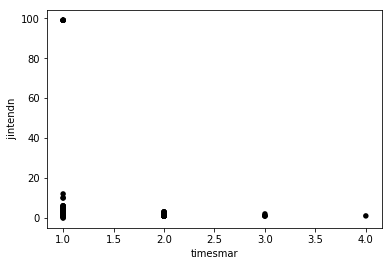

In [40]:
thinkplot.Scatter( timesmar, jintendn, alpha=1,color='black')
thinkplot.Config(xlabel='timesmar',
                 ylabel=' jintendn',
                 legend=False) 

The data fall into distinctive columns as they fall due to rounded columns. We can reduce this visual artifact by adding or subtracting random numbers to the data.


In [41]:
def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.normal(0, jitter, n) + values


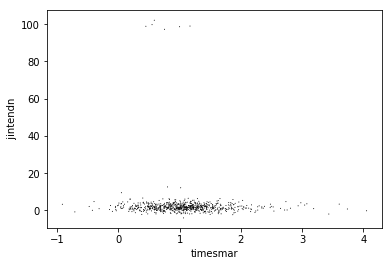

In [42]:
timesmar = Jitter(timesmar,0.5)
jintendn = Jitter(jintendn, 1.4)
thinkplot.Scatter(timesmar, jintendn, alpha=1,s=1,color='black')
thinkplot.Config(xlabel='timesmar',
                 ylabel=' jintendn',
                 legend=False)

There is little darkness between 0 to 2 it is related with value of alpha and s


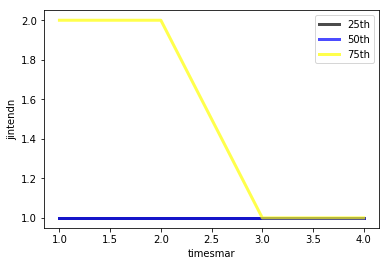

In [43]:
cleaned = resp.dropna(subset=['timesmar', 'jintendn'])
bins = np.arange(-1,5, 1)
indices = np.digitize(cleaned.timesmar, bins)
groups = cleaned.groupby(indices)
mean_timesmar = [group.timesmar.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.jintendn) for i, group in groups]
mean_timesmar
CustomColors = ["black","blue","yellow"] 
percent =[25, 50, 75] 
for i in range(len(percent)):
    jintendn_percentiles = [cdf.Percentile(percent[i]) for cdf in cdfs]
    label = '%dth' % percent[i]
    thinkplot.Plot(mean_timesmar, jintendn_percentiles, label=label,color=CustomColors[i])
    
thinkplot.Config(xlabel='timesmar',
                 ylabel='jintendn',
                 legend=True)

In [44]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov
cleaned = resp.dropna(subset=['timesmar', 'jintendn'])
timesmar, jintendn = cleaned.timesmar, cleaned.jintendn
Cov(timesmar, jintendn)
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [45]:
Corr(timesmar, jintendn)

-0.036523466523859585

it is not a strong correlation

In [46]:
from scipy import stats
stats.pearsonr(timesmar, jintendn)

(-0.036523466523859391, 0.23171606728546632)

not significant correlation , negative correlation,  timesmar increases, jintendn decreases.

In [47]:
stats.spearmanr(timesmar, jintendn)

SpearmanrResult(correlation=-0.083377477903482558, pvalue=0.0062565986838944328)

significant correlation, negative correlation, timesmar increases, jintendn decreases